In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ========== 1. Load dataset ==========
import pandas as pd
df = pd.read_csv('/content/SNAP(DFA).csv')
df.head()


print("=== Raw dataset info ===")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ========== 2. Convert 'Cell_*' object columns to numeric (currency → float) ==========

def currency_to_numeric(series: pd.Series) -> pd.Series:
    """
    Convert strings like '$157,388,240' to 157388240.0.
    Non-convertible values become NaN.
    """
    cleaned = series.astype(str).str.replace(r"[\$,]", "", regex=True).str.strip()
    return pd.to_numeric(cleaned, errors="coerce")

for col in df.columns:
    if col.startswith("Cell_") and df[col].dtype == "object":
        df[col] = currency_to_numeric(df[col])

# ========== 3. Define target and features ==========

# We treat the last column, 'Cell_30', as the target
target_col = df.columns[-1]
print("\nUsing target column:", target_col)

y = df[target_col]

# Features: all other numeric columns
X = df.drop(columns=[target_col])
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X = X[numeric_cols]

print("Number of numeric feature columns:", len(numeric_cols))
print("Numeric feature columns:", numeric_cols)

# ========== 4. Drop rows with missing values in X or y ==========

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=[target_col])
y = data[target_col]

print("\nAfter cleaning:")
print("X shape:", X.shape)
print("y length:", len(y))
print("Example y values:\n", y.head())

# ========== 5. Train-test split ==========

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


=== Raw dataset info ===
Shape: (10384, 36)
Columns: ['Date', 'County', 'County_Code', 'SFY', 'FFY', 'Consortium', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4', 'Cell_5', 'Cell_6', 'Cell_15', 'Cell_16', 'Cell_17', 'Cell_7', 'Cell_8', 'Cell_18', 'Cell_9', 'Cell_10', 'Cell_11', 'Cell_12', 'Cell_19', 'Cell_20', 'Cell_13', 'Cell_14', 'Cell_21', 'Cell_22', 'Cell_23', 'Cell_24', 'Cell_25', 'Cell_26', 'Cell_27', 'Cell_28', 'Cell_29', 'Cell_30']

Using target column: Cell_30
Number of numeric feature columns: 31
Numeric feature columns: ['County_Code', 'FFY', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4', 'Cell_5', 'Cell_6', 'Cell_15', 'Cell_16', 'Cell_17', 'Cell_7', 'Cell_8', 'Cell_18', 'Cell_9', 'Cell_10', 'Cell_11', 'Cell_12', 'Cell_19', 'Cell_20', 'Cell_13', 'Cell_14', 'Cell_21', 'Cell_22', 'Cell_23', 'Cell_24', 'Cell_25', 'Cell_26', 'Cell_27', 'Cell_28', 'Cell_29']

After cleaning:
X shape: (10379, 31)
y length: 10379
Example y values:
 0    157388240.0
1      4664588.0
2         6449.0
3        86193

In [8]:
!pip install nbconvert


In [ ]:
# ========== 6. Define models ==========

# Lasso (linear model with L1 regularization)
lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=1.0, max_iter=10000, random_state=42))
])

# Decision Tree Regressor (non-linear model)
tree_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
# ========== 7. Fit models ==========

print("\nFitting Lasso...")
lasso_model.fit(X_train, y_train)

print("Fitting Decision Tree Regressor...")
tree_model.fit(X_train, y_train)

# ========== 8. Predictions ==========

y_pred_lasso = lasso_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# ========== 9. Evaluation metrics ==========

def regression_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
    }

lasso_metrics = regression_metrics(y_test, y_pred_lasso)
tree_metrics = regression_metrics(y_test, y_pred_tree)

print("\n\n=== MODEL COMPARISON (REGRESSION) ===")

print("\n--- Lasso Regression ---")
for k, v in lasso_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n--- Decision Tree Regressor ---")
for k, v in tree_metrics.items():
    print(f"{k}: {v:.4f}")

    # ========== 10. Simple textual conclusion ==========

print("\n\n=== INTERPRETATION TIP ===")
if tree_metrics["R2"] > lasso_metrics["R2"]:
    print("Decision Tree has higher R^2 on the test set → it captures the variation in the target better than Lasso.")
else:
    print("Lasso has higher R^2 on the test set → the linear sparse model fits this dataset better than the Decision Tree.")

print("You can also compare MAE/MSE: lower values mean better performance.")


Fitting Lasso...
Fitting Decision Tree Regressor...


=== MODEL COMPARISON (REGRESSION) ===

--- Lasso Regression ---
R2: 0.9999
MSE: 423320450366.5616
MAE: 129723.3985

--- Decision Tree Regressor ---
R2: 0.9961
MSE: 12328354557532.6250
MAE: 1273694.7391


=== INTERPRETATION TIP ===
Lasso has higher R^2 on the test set → the linear sparse model fits this dataset better than the Decision Tree.
You can also compare MAE/MSE: lower values mean better performance.


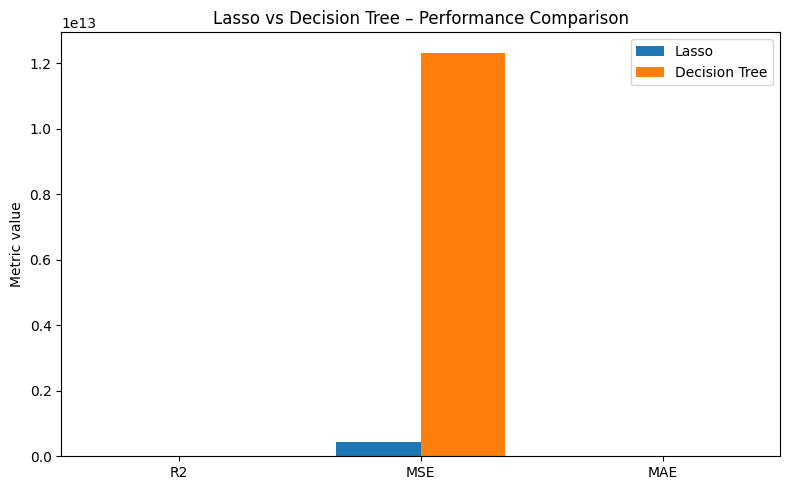

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Compute metrics
def regression_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
    }

lasso_metrics = regression_metrics(y_test, y_pred_lasso)
tree_metrics = regression_metrics(y_test, y_pred_tree)

metrics_names = list(lasso_metrics.keys())
lasso_values = [lasso_metrics[m] for m in metrics_names]
tree_values = [tree_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, lasso_values, width, label="Lasso")
plt.bar(x + width/2, tree_values, width, label="Decision Tree")

plt.xticks(x, metrics_names)
plt.ylabel("Metric value")
plt.title("Lasso vs Decision Tree – Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()



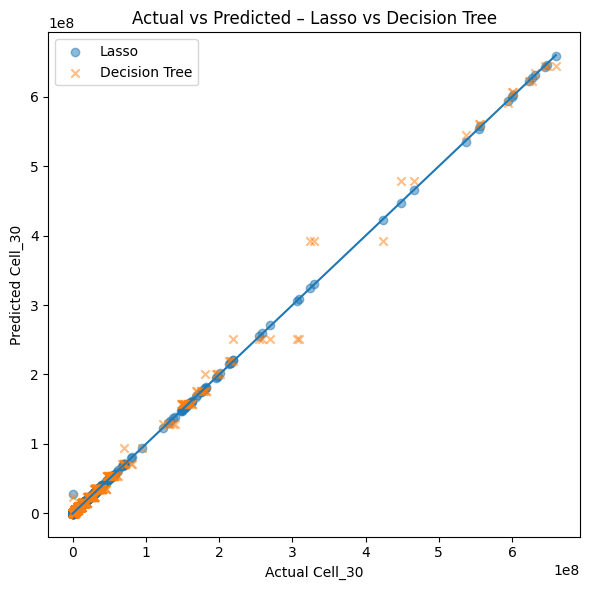

In [ ]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred_lasso, alpha=0.5, label="Lasso")
plt.scatter(y_test, y_pred_tree, alpha=0.5, marker="x", label="Decision Tree")

# 45-degree reference line
min_val = min(y_test.min(), y_pred_lasso.min(), y_pred_tree.min())
max_val = max(y_test.max(), y_pred_lasso.max(), y_pred_tree.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Cell_30")
plt.ylabel("Predicted Cell_30")
plt.title("Actual vs Predicted – Lasso vs Decision Tree")
plt.legend()
plt.tight_layout()
plt.show()


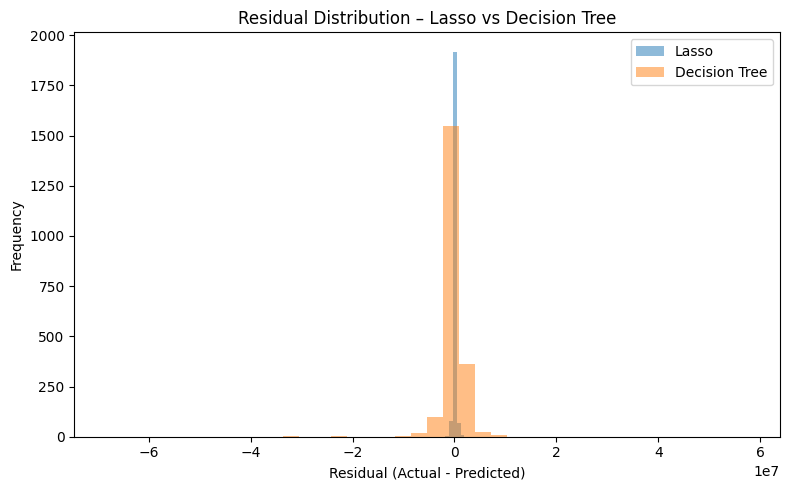

In [ ]:
res_lasso = y_test - y_pred_lasso
res_tree = y_test - y_pred_tree

plt.figure(figsize=(8, 5))
plt.hist(res_lasso, bins=40, alpha=0.5, label="Lasso")
plt.hist(res_tree, bins=40, alpha=0.5, label="Decision Tree")

plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution – Lasso vs Decision Tree")
plt.legend()
plt.tight_layout()
plt.show()


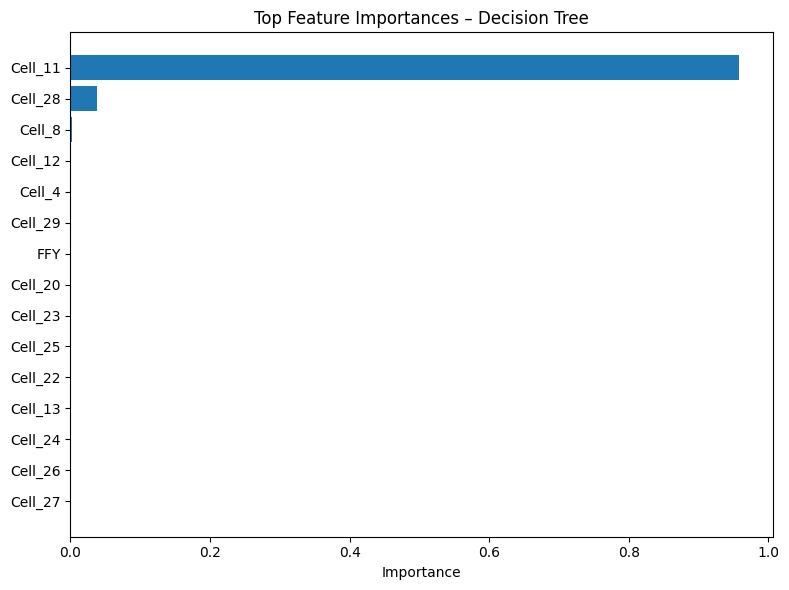

In [ ]:
import numpy as np

# Assuming X_train or X has your feature columns
feature_names = X.columns

importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending

top_n = 15  # change if you want more/less features
top_indices = indices[:top_n]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_indices)), importances[top_indices][::-1])
plt.yticks(range(len(top_indices)), feature_names[top_indices][::-1])
plt.xlabel("Importance")
plt.title("Top Feature Importances – Decision Tree")
plt.tight_layout()
plt.show()


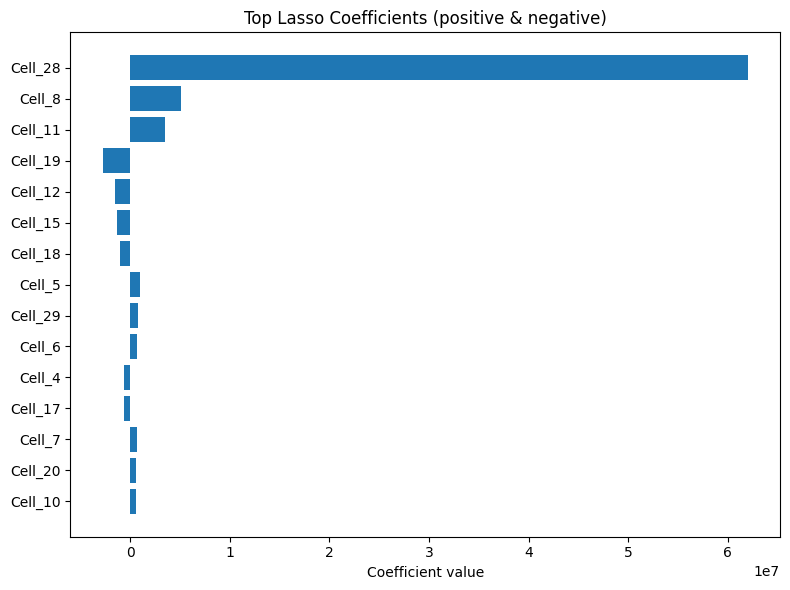

In [ ]:
# Get coefficients from the Lasso model inside the pipeline
lasso = lasso_model.named_steps["model"]
coef = lasso.coef_

feature_names = X.columns
coef_abs = np.abs(coef)
indices = np.argsort(coef_abs)[::-1]

top_n = 15
top_indices = indices[:top_n]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_indices)), coef[top_indices][::-1])
plt.yticks(range(len(top_indices)), feature_names[top_indices][::-1])
plt.xlabel("Coefficient value")
plt.title("Top Lasso Coefficients (positive & negative)")
plt.tight_layout()
plt.show()
